In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [13]:

cfar100 = tf.keras.datasets.cifar100
(X_train, Y_train), (X_test, Y_test) = cfar100.load_data()
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train,test_size=0.1 ,random_state = 40)
# X_train, X_test = X_train / 255.0 , X_test / 255.0
# normalization
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=24)


In [14]:
model = tf.keras.models.Sequential([
       tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
       tf.keras.layers.Dense(128, activation="relu"),
       tf.keras.layers.Dense(256, activation="relu"),
       tf.keras.layers.Dense(128, activation="relu"),
       tf.keras.layers.Dense(100, activation="softmax")   
])

In [15]:

model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001),
              loss= tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [18]:
model_output =  model.fit(X_train, Y_train, epochs= 15)
model.evaluate(X_test, Y_test)

Epoch 1/15
1266/1266 [==============================] - 11s 9ms/step - loss: 3.2230 - accuracy: 0.2028
Epoch 2/15
1266/1266 [==============================] - 11s 9ms/step - loss: 3.2190 - accuracy: 0.2024
Epoch 3/15
1266/1266 [==============================] - 11s 9ms/step - loss: 3.2011 - accuracy: 0.2056
Epoch 4/15
1266/1266 [==============================] - 11s 9ms/step - loss: 3.1878 - accuracy: 0.2095
Epoch 5/15
1266/1266 [==============================] - 11s 9ms/step - loss: 3.1832 - accuracy: 0.2098
Epoch 6/15
1266/1266 [==============================] - 11s 9ms/step - loss: 3.1721 - accuracy: 0.2100
Epoch 7/15
1266/1266 [==============================] - 11s 9ms/step - loss: 3.1602 - accuracy: 0.2136
Epoch 8/15
1266/1266 [==============================] - 11s 9ms/step - loss: 3.1573 - accuracy: 0.2128
Epoch 9/15
1266/1266 [==============================] - 9s 7ms/step - loss: 3.1459 - accuracy: 0.2155
Epoch 10/15
1266/1266 [==============================] - 11s 8ms/step - lo

[3.6312015056610107, 0.17733334004878998]

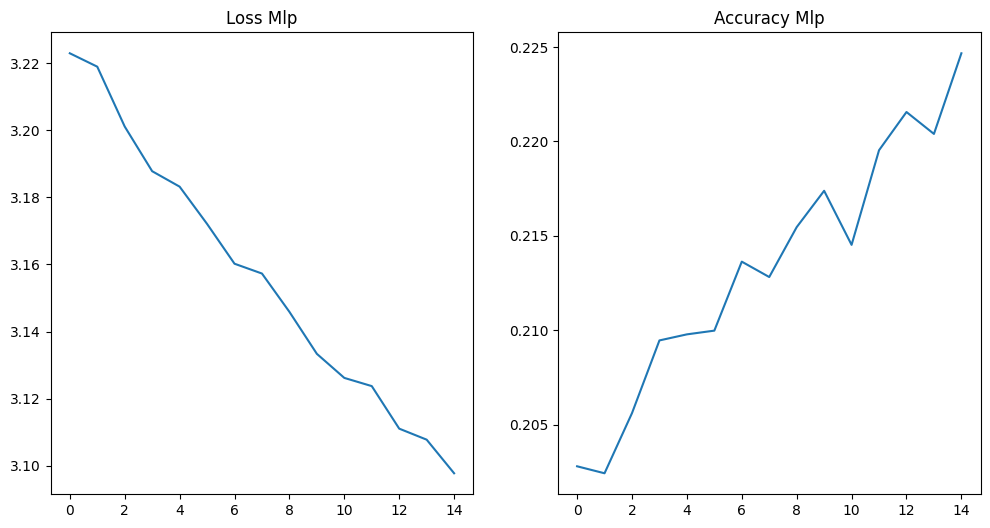

In [19]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(model_output.history['loss'])
ax1.set_title("Loss Mlp")
ax2.plot(model_output.history['accuracy'])
ax2.set_title("Accuracy Mlp")
plt.show()